<a href="https://colab.research.google.com/github/abracadabrabrabra/ml_labs-homework/blob/main/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml_lab1/unzipped/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ml_lab1/unzipped/test.csv')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07


#EDA

Размер датасета: (11017, 35)
Память: 5.95 MB
Количество признаков: 35
Количество объектов: 11017

Статистика RiskScore:
Уникальных значений RiskScore: 9790
Min: -9999999.0
Max: 10000000.0
Mean: -25698.784
Std: 1431674.590
Пропуски: 530 (4.8%)

После удаления явных выбросов: 10802 строк

Статистика после удаления экстремальных значений:
Min: 14.841417296887238
Max: 97.59724939432462
Mean: 48.36
Std: 17.24


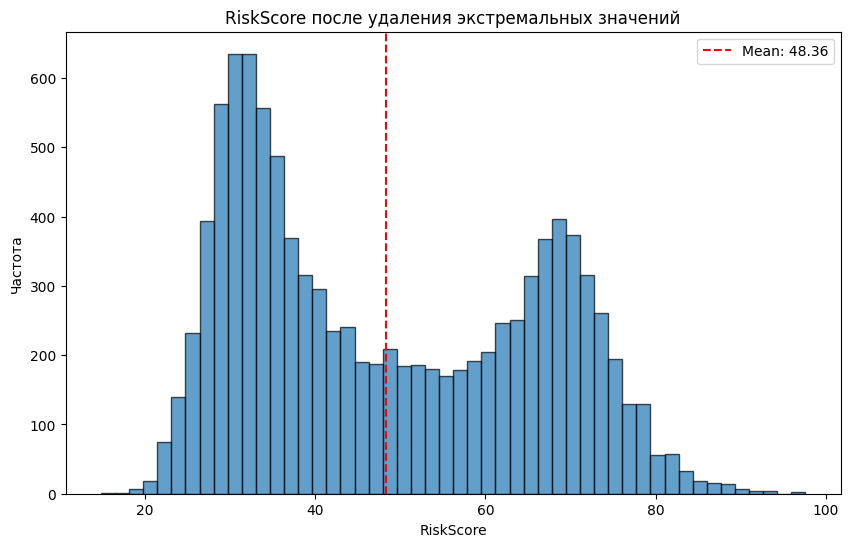

После удаления пропусков: 10272 строк
Удалено: 530 строк


In [ ]:
print(f"Размер датасета: {df.shape}")
print(f"Память: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Количество признаков: {df.shape[1]}")
print(f"Количество объектов: {df.shape[0]}")

print("\nСтатистика RiskScore:")
print(f"Уникальных значений RiskScore: {df['RiskScore'].nunique()}")
print(f"Min: {df['RiskScore'].min()}")
print(f"Max: {df['RiskScore'].max()}")
print(f"Mean: {df['RiskScore'].mean():.3f}")
print(f"Std: {df['RiskScore'].std():.3f}")
print(f"Пропуски: {df['RiskScore'].isna().sum()} ({df['RiskScore'].isna().mean()*100:.1f}%)")
df_clean = df[~df['RiskScore'].isin([-9999999.0, 10000000.0])].copy()

print(f"\nПосле удаления явных выбросов: {len(df_clean)} строк")

if len(df_clean) > 0:
    print("\nСтатистика после удаления экстремальных значений:")
    print(f"Min: {df_clean['RiskScore'].min()}")
    print(f"Max: {df_clean['RiskScore'].max()}")
    print(f"Mean: {df_clean['RiskScore'].mean():.2f}")
    print(f"Std: {df_clean['RiskScore'].std():.2f}")

    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['RiskScore'].dropna(), bins=50, alpha=0.7, edgecolor='black')
    plt.title('RiskScore после удаления экстремальных значений')
    plt.xlabel('RiskScore')
    plt.ylabel('Частота')
    plt.axvline(df_clean['RiskScore'].mean(), color='red', linestyle='--',
                label=f'Mean: {df_clean["RiskScore"].mean():.2f}')
    plt.legend()
    plt.show()

df_final = df_clean.dropna(subset=['RiskScore']).copy()
print(f"После удаления пропусков: {len(df_final)} строк")
print(f"Удалено: {len(df_clean) - len(df_final)} строк")


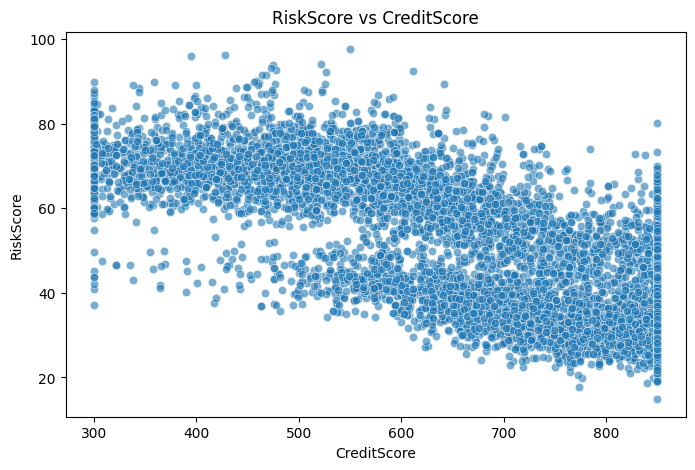

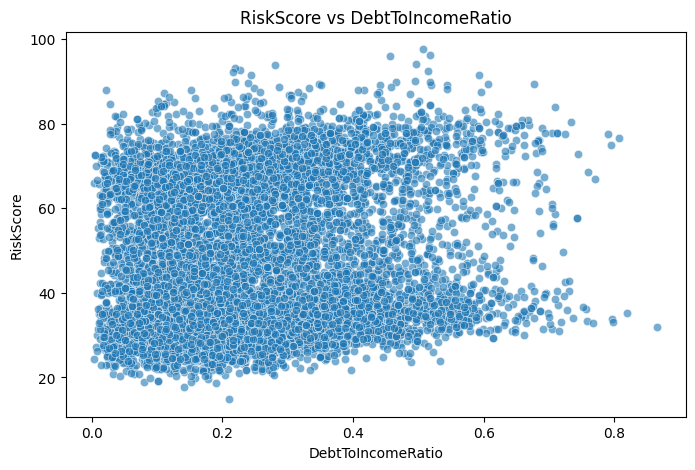

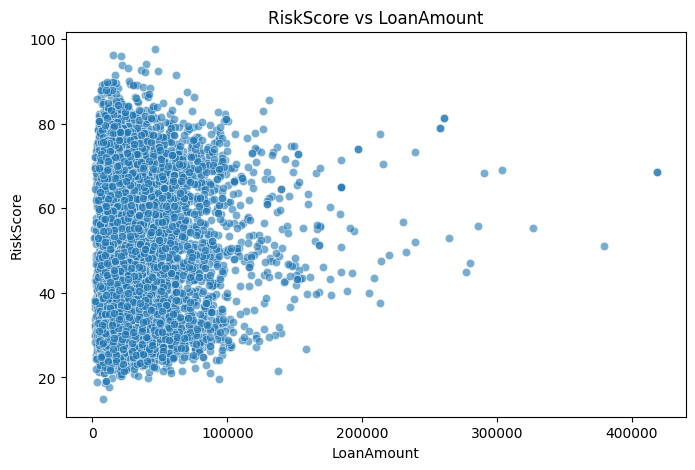

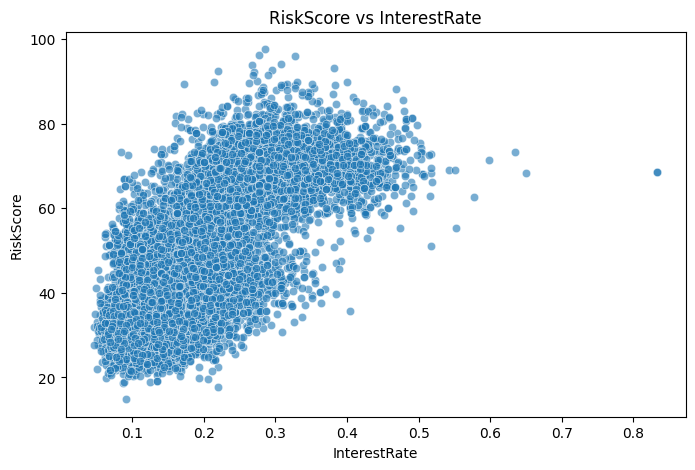

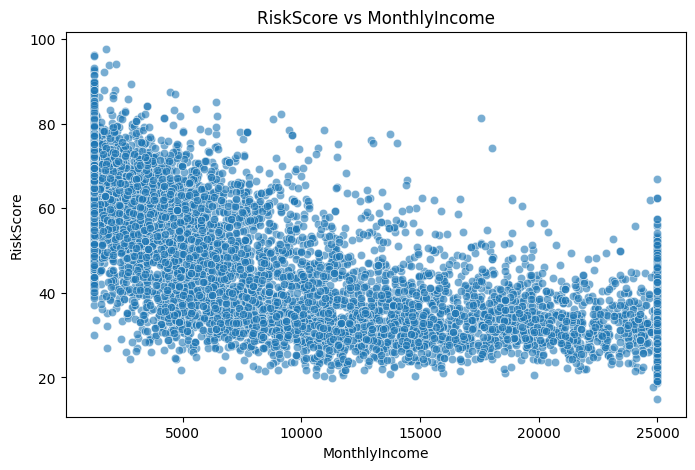

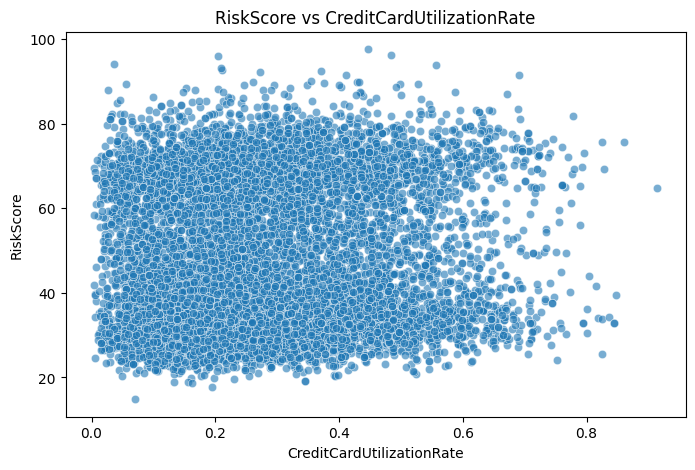

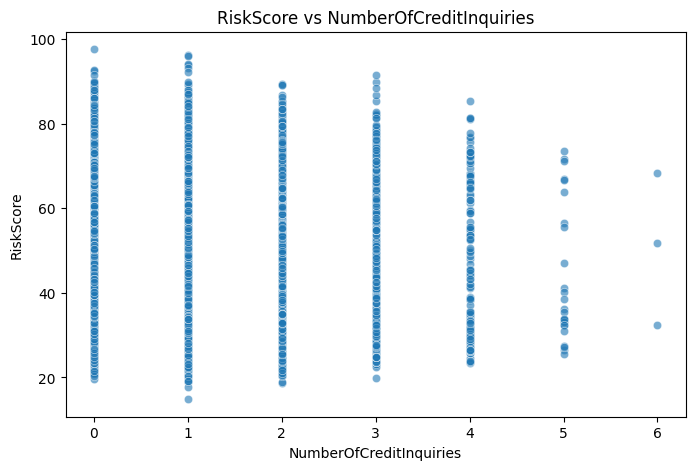

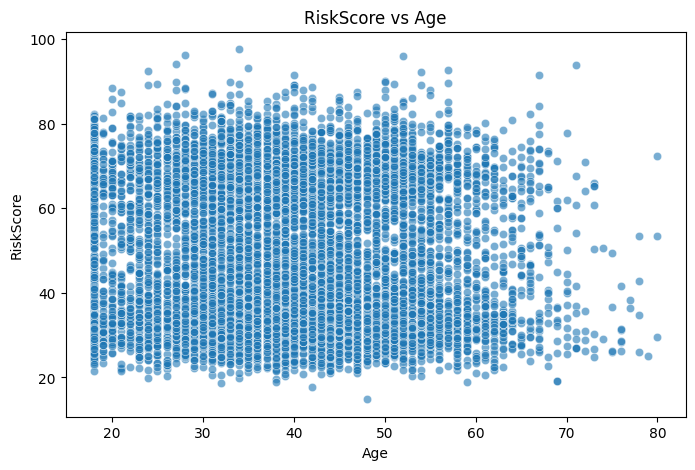

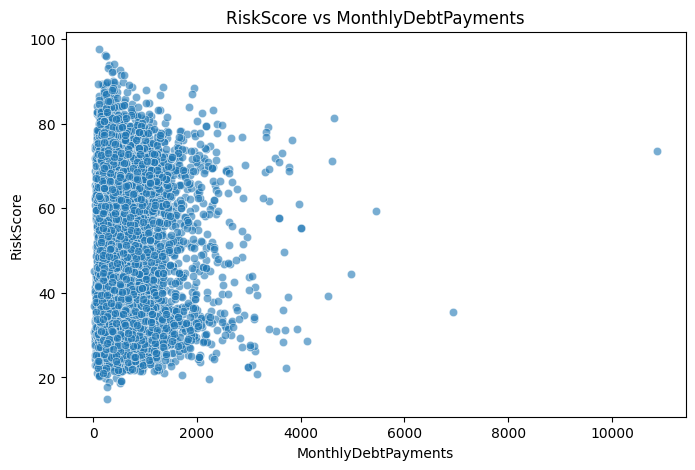

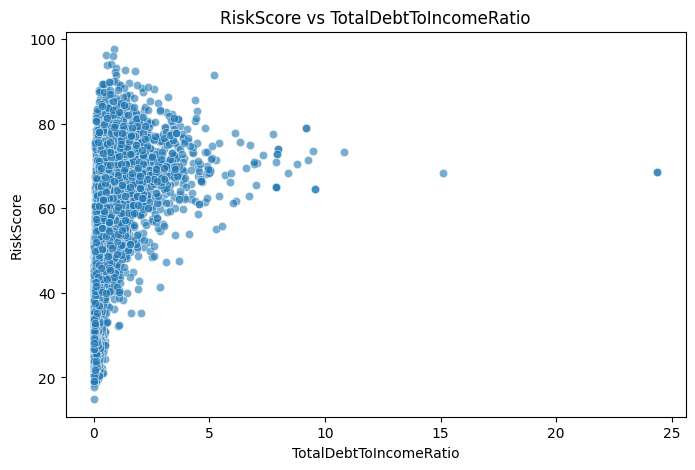

In [ ]:
key_features_vs_target = [
    'CreditScore',
    'DebtToIncomeRatio',
    'LoanAmount',
    'InterestRate',
    'MonthlyIncome',
    'CreditCardUtilizationRate',
    'NumberOfCreditInquiries',
    'Age',
    'MonthlyDebtPayments',
    'TotalDebtToIncomeRatio'
]

for feature in key_features_vs_target:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_final, x=feature, y='RiskScore', alpha=0.6)
    plt.title(f'RiskScore vs {feature}')
    plt.show()

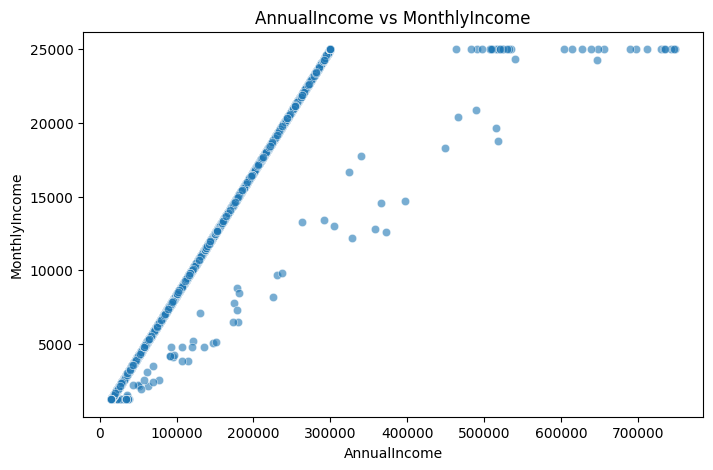

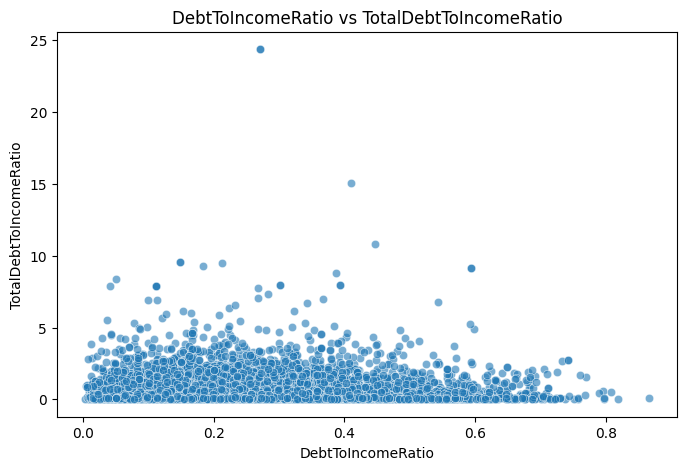

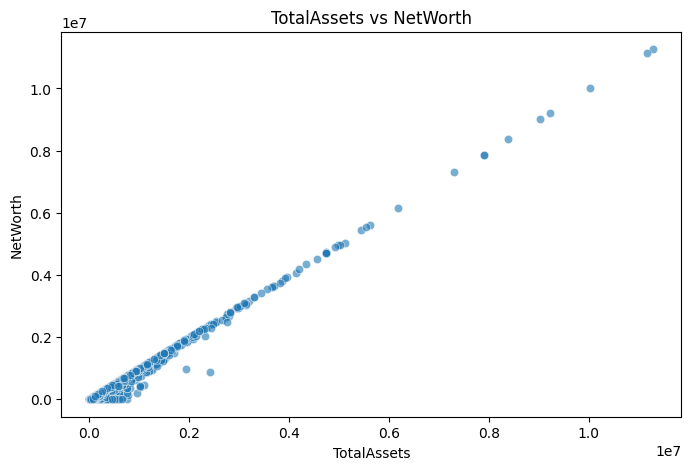

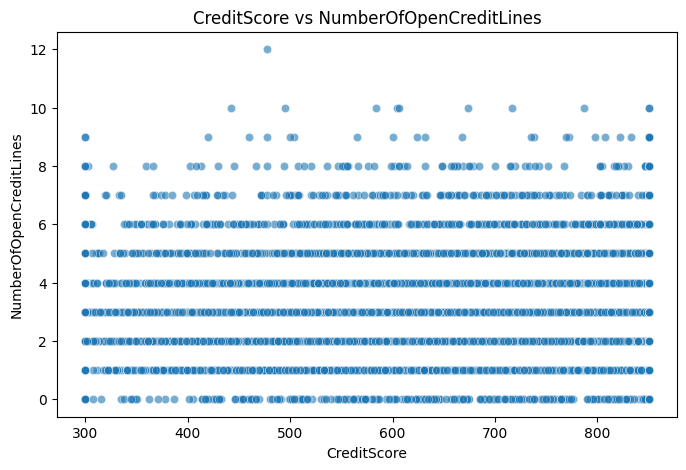

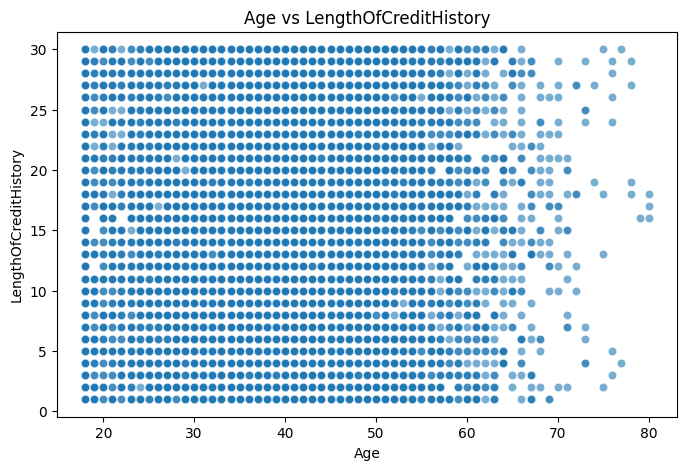

In [ ]:
# Признаки, которые могут быть сильно коррелированы
potential_correlated_pairs = [
    ('AnnualIncome', 'MonthlyIncome'),
    ('DebtToIncomeRatio', 'TotalDebtToIncomeRatio'),
    ('TotalAssets', 'NetWorth'),
    ('CreditScore', 'NumberOfOpenCreditLines'),
    ('Age', 'LengthOfCreditHistory')
]

for feat1, feat2 in potential_correlated_pairs:
    if feat1 in df_final.columns and feat2 in df_final.columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df_final, x=feat1, y=feat2, alpha=0.6)
        plt.title(f'{feat1} vs {feat2}')
        plt.show()

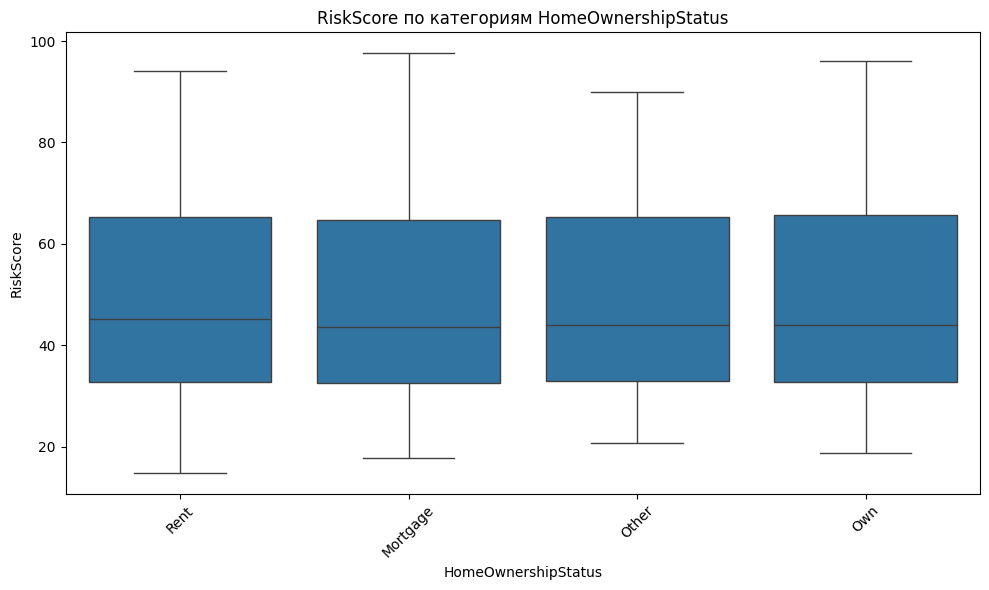

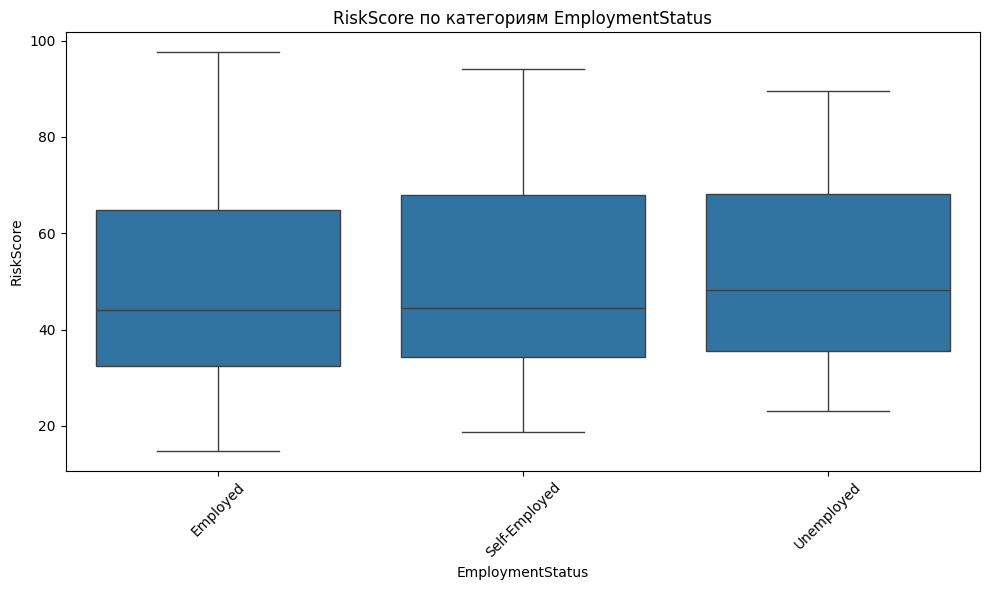

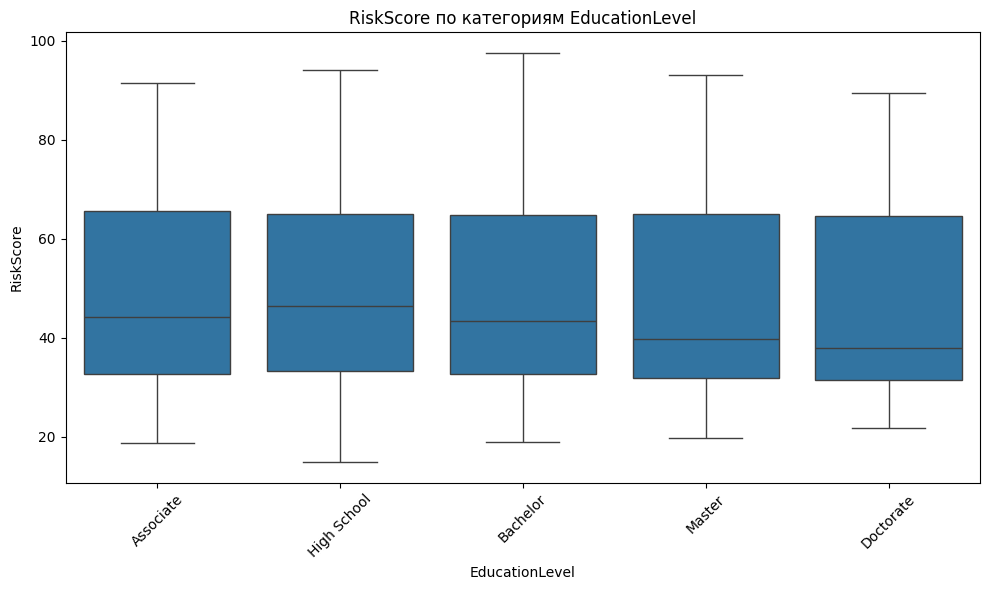

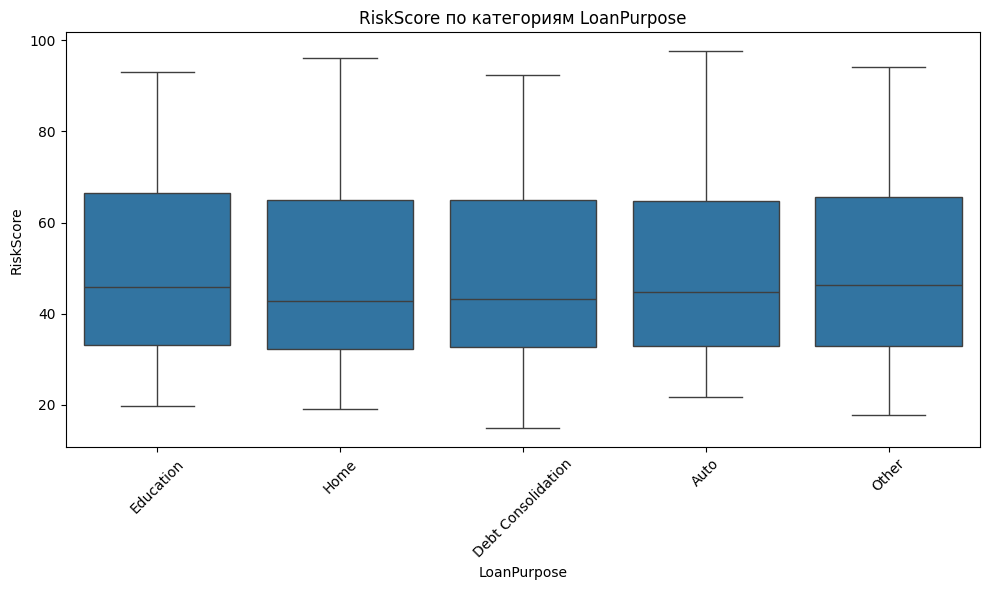

In [ ]:
# Ключевые категориальные признаки vs RiskScore
categorical_features = [
    'HomeOwnershipStatus',
    'EmploymentStatus',
    'EducationLevel',
    'LoanPurpose'
]

for feature in categorical_features:
    if feature in df_final.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_final, x=feature, y='RiskScore')
        plt.title(f'RiskScore по категориям {feature}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Risk score info:
- RiskScore: mean=-25698.78, std=1431674.59, min=-9999999.00, max=10000000.00
Топ признаков по корреляции с RiskScore:
- NumberOfDependents: -0.0233
- PaymentHistory: +0.0191
- TotalDebtToIncomeRatio: +0.0139
- UtilityBillsPaymentHistory: -0.0139
- MonthlyLoanPayment: +0.0124


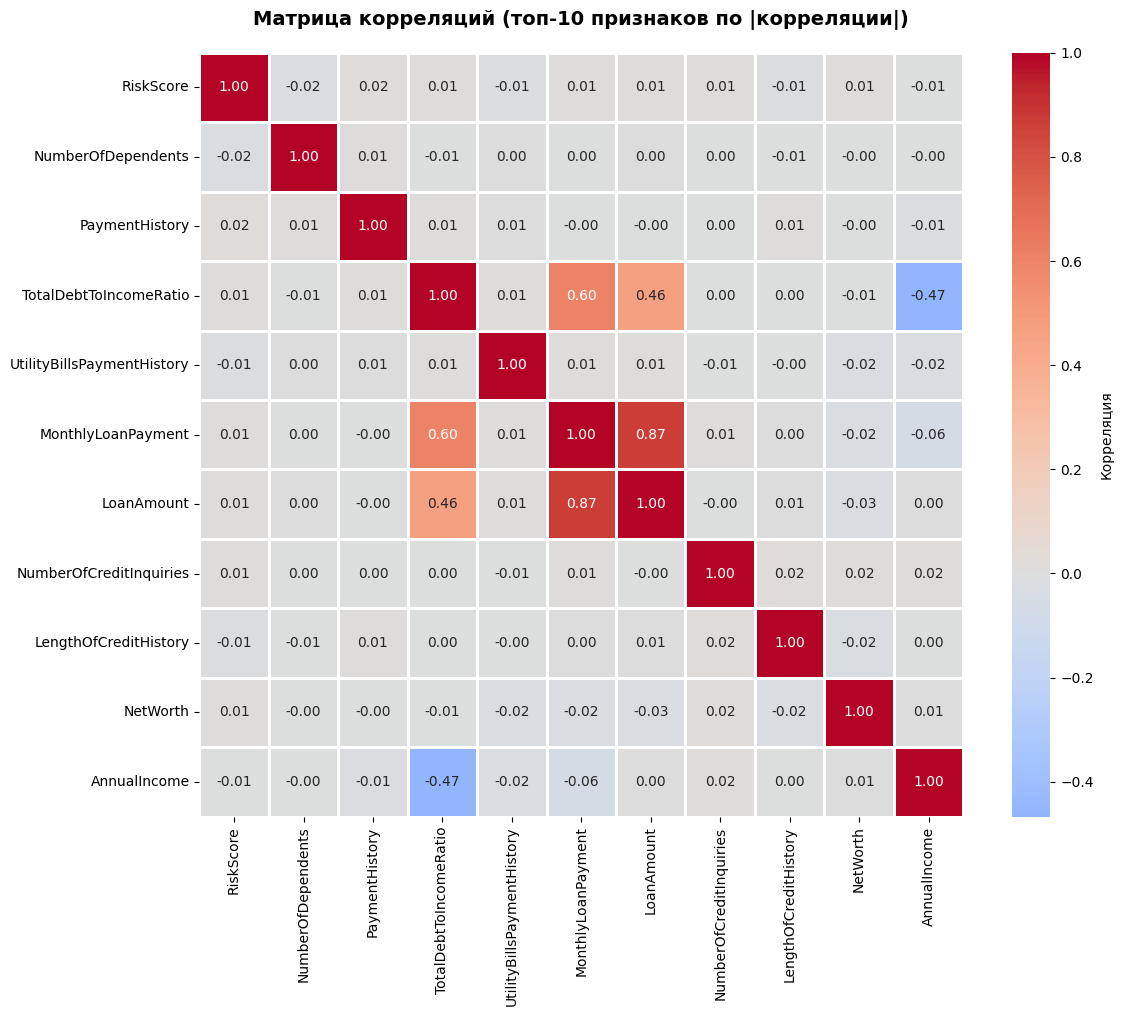

<Figure size 640x480 with 0 Axes>

In [ ]:
def corr_matrix(train_df):

    stats = train_df['RiskScore'].describe()
    print("=" * 70)
    print('Risk score info:')
    print(f"- RiskScore: mean={stats['mean']:.2f}, std={stats['std']:.2f}, min={stats['min']:.2f}, max={stats['max']:.2f}")
    print("=" * 70)

    numeric_features = train_df.select_dtypes(include=[np.number])
    correlations = numeric_features.corr()['RiskScore'].sort_values(ascending=False)
    print("Топ признаков по корреляции с RiskScore:")
    for feat, corr in correlations.abs().sort_values(ascending=False).head(6)[1:].items():
        print(f"- {feat}: {correlations[feat]:+.4f}")

    top_features = correlations.abs().sort_values(ascending=False).head(11).index.tolist()
    plt.figure(figsize=(12, 10))
    corr_matrix = numeric_features[top_features].corr()
    sns.heatmap(corr_matrix,
                annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={'label': 'Корреляция'})
    plt.title('Матрица корреляций (топ-10 признаков по |корреляции|)', fontsize=14, pad=20, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()


    return correlations


correlations = corr_matrix(df)

#Выводы:

# Самые важные признаки для модели:
top_features = [
    'CreditScore',           
    'MonthlyIncome',         
    'BaseInterestRate',      
    'AnnualIncome',          
    'InterestRate',          
    'TotalDebtToIncomeRatio'
]

# Признаки со слабой корреляцией (возможно, не нужны):
weak_predictors = [
    'DebtToIncomeRatio',     
    'NumberOfCreditInquiries',
    'CreditCardUtilizationRate'
]

# Сильно коррелированные пары (удалить дубли):
highly_correlated = {
    'MonthlyIncome <-> AnnualIncome',
    'TotalAssets <-> NetWorth'  
}



#Preprocessing

In [ ]:
import numpy as np
import pandas as pd


def create_features(df):
    df_enhanced = df.copy()

    if 'CreditScore' in df_enhanced.columns:
        df_enhanced['CreditScore_squared'] = df_enhanced['CreditScore'] ** 2
        df_enhanced['CreditScore_cubed'] = df_enhanced['CreditScore'] ** 3

    if 'MonthlyIncome' in df_enhanced.columns:
        df_enhanced['MonthlyIncome_squared'] = df_enhanced['MonthlyIncome'] ** 2

    if 'AnnualIncome' in df_enhanced.columns:
        df_enhanced['AnnualIncome_squared'] = df_enhanced['AnnualIncome'] ** 2

    if all(col in df_enhanced.columns for col in ['CreditScore', 'MonthlyIncome']):
        df_enhanced['CreditScore_x_Income'] = df_enhanced['CreditScore'] * df_enhanced['MonthlyIncome']

    if all(col in df_enhanced.columns for col in ['CreditScore', 'TotalDebtToIncomeRatio']):
        df_enhanced['Credit_x_DebtRatio'] = df_enhanced['CreditScore'] * df_enhanced['TotalDebtToIncomeRatio']

    if all(col in df_enhanced.columns for col in ['InterestRate', 'LoanAmount']):
        df_enhanced['Interest_x_Loan'] = df_enhanced['InterestRate'] * df_enhanced['LoanAmount']

    if all(col in df_enhanced.columns for col in ['LoanAmount', 'AnnualIncome']):
        df_enhanced['LoanToAnnualIncome'] = df_enhanced['LoanAmount'] / (df_enhanced['AnnualIncome'] + 1)

    if all(col in df_enhanced.columns for col in ['MonthlyLoanPayment', 'MonthlyIncome']):
        df_enhanced['PaymentToIncome'] = df_enhanced['MonthlyLoanPayment'] / (df_enhanced['MonthlyIncome'] + 1)

    return df_enhanced

def select_best_features(train_df, target_col='RiskScore', top_n=30):
    feature_correlations = train_df.corr()[target_col].abs()
    sorted_correlations = feature_correlations.drop(target_col).sort_values(ascending=False)

    best_features = sorted_correlations.head(top_n).index.tolist()

    print(f"Топ-{len(best_features)} признаков по корреляции:")
    for feature, value in sorted_correlations.head(5).items():
        print(f"- {feature}: {value:.4f}")

    return best_features


def preprocessing(train_df, test_df=None):
    print("Предобработка данных:")

    train_processed = train_df.copy()
    initial_count = len(train_processed)

    if 'RiskScore' in train_processed.columns:
        train_processed = train_processed.dropna(subset=['RiskScore']).copy()
        train_processed = train_processed[
            (train_processed['RiskScore'] > -100) &
            (train_processed['RiskScore'] < 150)
        ].copy()

        lower_bound = train_processed['RiskScore'].quantile(0.005)
        upper_bound = train_processed['RiskScore'].quantile(0.995)
        train_processed = train_processed[
            (train_processed['RiskScore'] >= lower_bound) &
            (train_processed['RiskScore'] <= upper_bound)
        ].copy()

        removed_outliers = initial_count - len(train_processed)
        print(f"- Удалено выбросов: {removed_outliers}")

    target = train_processed['RiskScore'].values
    train_features = train_processed.drop(columns=['RiskScore'])
    test_features = test_df.copy() if test_df is not None else None

    def process_date_features(df):
        if df is None or 'ApplicationDate' not in df.columns:
            return df

        df_copy = df.copy()
        df_copy['ApplicationDate'] = pd.to_datetime(df_copy['ApplicationDate'], errors='coerce')

        df_copy['AppYear'] = df_copy['ApplicationDate'].dt.year
        df_copy['AppMonth'] = df_copy['ApplicationDate'].dt.month
        df_copy['AppWeek'] = df_copy['ApplicationDate'].dt.isocalendar().week.astype(float)
        df_copy['AppDay'] = df_copy['ApplicationDate'].dt.day
        df_copy['AppDayOfWeek'] = df_copy['ApplicationDate'].dt.dayofweek

        return df_copy.drop(columns=['ApplicationDate'])

    train_features = process_date_features(train_features)
    test_features = process_date_features(test_features)

    train_features = create_features(train_features)
    if test_features is not None:
        test_features = create_features(test_features)

    categorical_columns = train_features.select_dtypes(include=['object']).columns.tolist()
    print(f"- Категориальных признаков: {len(categorical_columns)}")

    numeric_columns = train_features.select_dtypes(include=[np.number]).columns.tolist()

    numeric_medians = {col: train_features[col].median() for col in numeric_columns}
    train_features[numeric_columns] = train_features[numeric_columns].fillna(numeric_medians)

    if test_features is not None:
        for col in numeric_columns:
            if col in test_features.columns:
                test_features[col] = test_features[col].fillna(numeric_medians.get(col, 0))

    quantile_bounds = train_features[numeric_columns].quantile([0.01, 0.99])
    for col in numeric_columns:
        low, high = quantile_bounds.loc[0.01, col], quantile_bounds.loc[0.99, col]
        train_features[col] = train_features[col].clip(low, high)
        if test_features is not None and col in test_features.columns:
            test_features[col] = test_features[col].clip(low, high)

    skewed_features = [
        col for col in numeric_columns
        if train_features[col].min() > 0 and train_features[col].skew() > 1
    ]

    for col in skewed_features:
        train_features[f"{col}_log"] = np.log1p(train_features[col])
        if test_features is not None and col in test_features.columns:
            test_features[f"{col}_log"] = np.log1p(
                np.clip(test_features[col], a_min=0, a_max=None)
            )

    def fill_missing_categorical(df, columns):
        for col in columns:
            if col in df.columns:
                df[col] = df[col].fillna("missing")
        return df

    train_features = fill_missing_categorical(train_features, categorical_columns)
    if test_features is not None:
        test_features = fill_missing_categorical(test_features, categorical_columns)

    combined_data = pd.concat([train_features, test_features], axis=0, ignore_index=True) \
        if test_features is not None else train_features.copy()

    combined_encoded = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

    if test_features is not None:
        train_encoded = combined_encoded.iloc[:len(train_features)].reset_index(drop=True)
        test_encoded = combined_encoded.iloc[len(train_features):].reset_index(drop=True)
    else:
        train_encoded = combined_encoded
        test_encoded = None

    feature_correlations = train_encoded.corrwith(pd.Series(target)).abs()
    sorted_features = feature_correlations.sort_values(ascending=False)

    top_features = sorted_features.head(70).index.tolist()
    top20_features = sorted_features.head(25).index.tolist()
    top_interaction_features = sorted_features.head(12).index.tolist()

    print(f"- Отобрано признаков: {len(top_features)}")

    def construct_feature_matrix(df_encoded):
        X_matrix = df_encoded[top_features].copy()

        for col in top_features:
            if (df_encoded[col] > 0).all() and not col.endswith("_log"):
                X_matrix[f"{col}_log"] = np.log1p(df_encoded[col])

        for col in top20_features:
            X_matrix[f"{col}_sq"] = df_encoded[col] ** 2

        for i in range(len(top_interaction_features)):
            for j in range(i + 1, len(top_interaction_features)):
                feat1, feat2 = top_interaction_features[i], top_interaction_features[j]
                X_matrix[f"{feat1}_x_{feat2}"] = df_encoded[feat1] * df_encoded[feat2]

        X_matrix = X_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)
        return X_matrix

    X_train_final = construct_feature_matrix(train_encoded)
    X_test_final = construct_feature_matrix(test_encoded) if test_encoded is not None else None

    # Приведение к единому типу данных
    X_train_final = X_train_final.astype(float)
    if X_test_final is not None:
        X_test_final = X_test_final.astype(float)

    print(f"- Размер train матрицы: {X_train_final.shape[0]} строк × {X_train_final.shape[1]} столбцов")
    print(f"- Статистика RiskScore: min={target.min():.2f}, max={target.max():.2f}, mean={target.mean():.2f}")

    # Конвертация в массивы numpy
    X_train_array = X_train_final.values
    X_test_array = X_test_final.values if X_test_final is not None else None

    processed_data = pd.concat([X_train_final, pd.Series(target, name="RiskScore")], axis=1)

    return X_train_array, target, X_test_array, processed_data

#Normalization

In [ ]:
class Normalizer:
    def __init__(self, method='z-score'):
        self.method = method
        self.params = {}

    def fit(self, X):
        if self.method == 'z-score':
            self.params['mean'] = np.mean(X, axis=0)
            self.params['std'] = np.std(X, axis=0)
        elif self.method == 'min-max':
            self.params['min'] = np.min(X, axis=0)
            self.params['max'] = np.max(X, axis=0)
        return self

    def transform(self, X):
        epsilon = 1e-8
        if self.method == 'z-score':
            return (X - self.params['mean']) / (self.params['std'] + epsilon)
        elif self.method == 'min-max':
            denominator = self.params['max'] - self.params['min'] + epsilon
            return (X - self.params['min']) / denominator

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


def apply_normalization(X, method='z-score'):
    print(f"Нормализация: {method}")

    norm = Normalizer(method)
    X_norm = norm.fit_transform(X)

    print(f"- До: mean={np.mean(X, axis=0)[:3]}, std={np.std(X, axis=0)[:3]}")
    print(f"- После: mean={np.mean(X_norm, axis=0)[:3]}, std={np.std(X_norm, axis=0)[:3]}")

    return X_norm, norm


def compare_normalizations(X, y, model_class, normalizers_dict):
    print("Сравнение нормализаций:")

    scores = []

    for name, normalizer in normalizers_dict.items():
        X_processed = normalizer.fit_transform(X)

        model = model_class()
        model.fit(X_processed, y)
        predictions = model.predict(X_processed)

        error = np.mean((y - predictions) ** 2)
        scores.append((name, error))

        print(f"- {name}: mse={error:.4f}")
        print(f"  mean={np.mean(X_processed, axis=0)[:3]}")
        print(f"  std={np.std(X_processed, axis=0)[:3]}")

    best_method, best_score = min(scores, key=lambda x: x[1])
    print(f"Лучший метод: {best_method} (mse={best_score:.4f})")

    return scores


X, y, X_test, train_processed = preprocessing(df, test_df)
clip_bounds = np.quantile(y, [0.02, 0.98])

X_zscore, zscore_normalizer = apply_normalization(X, 'z-score')
X_minmax, minmax_normalizer = apply_normalization(X, 'min-max')

normalizers = {
    'Z-Score': zscore_normalizer,
    'Min-Max': minmax_normalizer
}

comparison_results = compare_normalizations(
    X, y,
    lambda: LinearRegressionCustom(method='analytical', alpha=1.0),
    normalizers
)

X_normalized = X_zscore

Предобработка данных:
- Удалено выбросов: 849
- Категориальных признаков: 5
- Отобрано признаков: 70


/tmp/ipython-input-4159786083.py:173: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_matrix[f"{feat1}_x_{feat2}"] = df_encoded[feat1] * df_encoded[feat2]
/tmp/ipython-input-4159786083.py:173: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_matrix[f"{feat1}_x_{feat2}"] = df_encoded[feat1] * df_encoded[feat2]
/tmp/ipython-input-4159786083.py:173: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

- Размер train матрицы: 10168 строк × 184 столбцов
- Статистика RiskScore: min=22.09, max=85.33, mean=48.29
Нормализация: z-score
- До: mean=[492235.95957907  10842.49752491 130514.78461841], std=[212356.34223516   9382.39780898 112654.50979311]
- После: mean=[-5.45066221e-17 -1.06916836e-16  1.53736627e-17], std=[1. 1. 1.]
Нормализация: min-max
- До: mean=[492235.95957907  10842.49752491 130514.78461841], std=[212356.34223516   9382.39780898 112654.50979311]
- После: mean=[0.63594618 0.40389463 0.40531503], std=[0.33574125 0.39504833 0.39527898]
Сравнение нормализаций:
- Z-Score: mse=25.9247
  mean=[-5.45066221e-17 -1.06916836e-16  1.53736627e-17]
  std=[1. 1. 1.]
- Min-Max: mse=26.8468
  mean=[0.63594618 0.40389463 0.40531503]
  std=[0.33574125 0.39504833 0.39527898]
Лучший метод: Z-Score (mse=25.9247)


#Selection of hyperparameters

In [ ]:
def tune_ridge_alpha(
    X, y, alphas=None, k=5, random_state=42, clip_bounds=None
):
    from sklearn.linear_model import Ridge, LinearRegression
    from sklearn.model_selection import KFold

    alphas = alphas or [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

    def evaluate_alpha(alpha):
        model = LinearRegression() if alpha == 0 else Ridge(alpha=alpha)
        fold_mses = []

        for train_idx, val_idx in kf.split(X):
            model.fit(X[train_idx], y[train_idx])
            pred = model.predict(X[val_idx])

            if clip_bounds:
                pred = np.clip(pred, *clip_bounds)

            mse = np.mean((y[val_idx] - pred) ** 2)
            fold_mses.append(mse)

        return np.mean(fold_mses)

    results = {alpha: evaluate_alpha(alpha) for alpha in alphas}
    best_alpha = min(results, key=results.get)

    print("Результаты подбора alpha:")
    for alpha, mse in results.items():
        model_type = "Linear" if alpha == 0 else "Ridge"
        print(f"{model_type:6} (alpha={alpha:4}) -> MSE: {mse:.5f}")

    print(f"\nОптимальный alpha: {best_alpha}")
    return best_alpha

best_alpha = tune_ridge_alpha(X_normalized, y)

Результаты подбора alpha:
Linear (alpha= 0.0) -> MSE: 34.80275
Ridge  (alpha=0.01) -> MSE: 26.47580
Ridge  (alpha=0.05) -> MSE: 26.50190
Ridge  (alpha= 0.1) -> MSE: 26.52099
Ridge  (alpha= 0.2) -> MSE: 26.55230
Ridge  (alpha= 0.3) -> MSE: 26.58191
Ridge  (alpha= 0.5) -> MSE: 26.63836
Ridge  (alpha= 0.8) -> MSE: 26.71399
Ridge  (alpha= 1.0) -> MSE: 26.75832

Оптимальный alpha: 0.01


#Linear regression

In [ ]:
import numpy as np
import time
from typing import Optional, Tuple, List, Any, Union
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge as SklearnRidge


class LinearRegressionCustom:
    def __init__(self, method='analytical', learning_rate=0.01, n_iterations=1000,
                 batch_size=32, early_stopping=True, tol=1e-4, alpha=0.0, clip_bounds=None):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.early_stopping = early_stopping
        self.tol = tol
        self.alpha = alpha
        self.clip_bounds = clip_bounds
        self.weights = None
        self.bias = None
        self.training_time = 0
        self.loss_history = []

    def fit(self, X, y):
        start_time = time.time()

        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).flatten()

        if len(X) != len(y):
            raise ValueError(f"Размеры X ({len(X)}) и y ({len(y)}) не совпадают")

        method_dispatcher = {
            'analytical': self._fit_analytical,
            'gradient_descent': self._fit_gradient_descent,
            'sgd': self._fit_stochastic_gradient_descent
        }

        if self.method not in method_dispatcher:
            raise ValueError(f"Метод '{self.method}' не поддерживается. "
                           f"Доступные методы: {list(method_dispatcher.keys())}")

        method_dispatcher[self.method](X, y)

        self.training_time = time.time() - start_time
        return self

    def _fit_analytical(self, X, y):
        X_augmented = np.column_stack([np.ones(len(X)), X])

        if self.alpha > 0:
            XTX = X_augmented.T @ X_augmented
            reg_matrix = self.alpha * np.eye(XTX.shape[0])
            reg_matrix[0, 0] = 0

            try:
                theta = np.linalg.solve(XTX + reg_matrix, X_augmented.T @ y)
            except np.linalg.LinAlgError:
                theta = np.linalg.pinv(XTX + reg_matrix) @ X_augmented.T @ y
        else:
            theta = np.linalg.pinv(X_augmented) @ y

        self.bias = float(theta[0])
        self.weights = theta[1:].flatten()

        y_pred = self.predict(X)
        self.loss_history = [np.mean((y - y_pred) ** 2)]

    def _fit_gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.loss_history = []

        for iteration in range(self.n_iterations):
            y_pred = X @ self.weights + self.bias

            loss = np.mean((y_pred - y) ** 2) + self._ridge_penalty()
            self.loss_history.append(loss)

            error = y_pred - y
            dw = (2 / n_samples) * X.T @ error + 2 * self.alpha * self.weights
            db = (2 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self._should_stop_early(iteration):
                break

    def _fit_stochastic_gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.loss_history = []

        for epoch in range(self.n_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                batch_size = len(X_batch)

                y_pred_batch = X_batch @ self.weights + self.bias

                error_batch = y_pred_batch - y_batch
                dw = (2 / batch_size) * X_batch.T @ error_batch + 2 * self.alpha * self.weights
                db = (2 / batch_size) * np.sum(error_batch)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_pred_full = X @ self.weights + self.bias
            loss = np.mean((y_pred_full - y) ** 2) + self._ridge_penalty()
            self.loss_history.append(loss)

            if self._should_stop_early(epoch):
                break

    def _ridge_penalty(self):
        return self.alpha * np.sum(self.weights ** 2) if self.alpha > 0 else 0.0

    def _should_stop_early(self, iteration):
        if not self.early_stopping or iteration < 10:
            return False

        if len(self.loss_history) < 2:
            return False

        loss_diff = abs(self.loss_history[-1] - self.loss_history[-2])
        return loss_diff < self.tol

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Модель не обучена. Вызовите fit() перед predict().")

        X = np.array(X, dtype=np.float64)
        y_pred = X @ self.weights + self.bias

        if self.clip_bounds is not None:
            low, high = self.clip_bounds
            y_pred = np.clip(y_pred, low, high)

        return y_pred

    def get_params(self):
        return {
            'method': self.method,
            'weights': self.weights.copy() if self.weights is not None else None,
            'bias': self.bias,
            'training_time': self.training_time,
            'final_loss': self.loss_history[-1] if self.loss_history else None
        }


def tune_hyperparameters(X_train, y_train, X_val, y_val, method='gradient_descent', clip_bounds=None):
    lr_ranges = {
        'gradient_descent': [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2],
        'sgd': [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
    }

    learning_rates = lr_ranges.get(method, [0.001, 0.01])
    best_lr, best_mse = None, float('inf')

    for lr in learning_rates:
        try:
            model_params = {
                'method': method,
                'learning_rate': lr,
                'clip_bounds': clip_bounds
            }

            if method == 'gradient_descent':
                model_params['n_iterations'] = 1000
            elif method == 'sgd':
                model_params['n_iterations'] = 100
                model_params['batch_size'] = 32

            model = LinearRegressionCustom(**model_params)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            mse = np.mean((y_val - y_pred) ** 2)

            if np.isfinite(mse) and mse < best_mse:
                best_mse, best_lr = mse, lr

        except Exception as e:
            continue

    return best_lr if best_lr is not None else 0.01


def analyze_feature_importance(model, feature_names=None, top_n=5):
    if model.weights is None:
        print("Модель не обучена")
        return

    weights_abs = np.abs(model.weights)

    if np.all(weights_abs == 0):
        print("Все веса равны нулю")
        return

    top_indices = np.argsort(weights_abs)[-top_n:][::-1]

    print(f"\nТоп-{top_n} важных признаков:")
    print("-" * 40)

    for rank, idx in enumerate(top_indices, 1):
        feat_name = f"Признак_{idx}" if feature_names is None else feature_names[idx]
        weight = model.weights[idx]
        abs_weight = weights_abs[idx]
        sign = "+" if weight >= 0 else "-"

        print(f"{rank:2}. {feat_name:<20} : {weight:8.4f} ({sign}{abs_weight:.4f})")


def compare_models(X, y, test_size=0.2, random_state=42, alpha=1.0, clip_bounds=None):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print("=" * 70)
    print("СРАВНЕНИЕ МЕТОДОВ ЛИНЕЙНОЙ РЕГРЕССИИ")
    print("=" * 70)
    print(f"Размер обучающей выборки: {X_train.shape[0]} примеров")
    print(f"Размер валидационной выборки: {X_val.shape[0]} примеров")
    print(f"Количество признаков: {X_train.shape[1]}")
    print(f"Параметр регуляризации alpha: {alpha}")
    print("=" * 70)

    results = []
    models_info = []

    print("\n1. Аналитическое решение (Ridge):")
    print("-" * 40)
    model_analytical = LinearRegressionCustom(
        method='analytical',
        alpha=alpha,
        clip_bounds=clip_bounds
    )
    model_analytical.fit(X_train, y_train)

    y_pred = model_analytical.predict(X_val)
    mse_analytical = np.mean((y_val - y_pred) ** 2)

    print(f"   MSE: {mse_analytical:.6f}")
    print(f"   Время обучения: {model_analytical.training_time:.4f} сек")
    print(f"   Число параметров: {len(model_analytical.weights) + 1}")

    analyze_feature_importance(model_analytical)

    results.append(('Analytical (Ridge)', mse_analytical,
                   model_analytical.training_time, model_analytical))
    models_info.append(model_analytical)

    print("\n2. Градиентный спуск:")
    print("-" * 40)

    best_lr_gd = tune_hyperparameters(
        X_train, y_train, X_val, y_val,
        method='gradient_descent',
        clip_bounds=clip_bounds
    )

    model_gd = LinearRegressionCustom(
        method='gradient_descent',
        learning_rate=best_lr_gd,
        n_iterations=1000,
        alpha=alpha,
        early_stopping=True,
        tol=1e-6,
        clip_bounds=clip_bounds
    )
    model_gd.fit(X_train, y_train)

    y_pred = model_gd.predict(X_val)
    mse_gd = np.mean((y_val - y_pred) ** 2)

    print(f"   Оптимальный LR: {best_lr_gd}")
    print(f"   MSE: {mse_gd:.6f}")
    print(f"   Время обучения: {model_gd.training_time:.4f} сек")
    print(f"   Эпох обучения: {len(model_gd.loss_history)}")

    results.append(('Gradient Descent', mse_gd,
                   model_gd.training_time, model_gd))
    models_info.append(model_gd)

    print("\n3. Стохастический градиентный спуск (SGD):")
    print("-" * 40)

    best_lr_sgd = tune_hyperparameters(
        X_train, y_train, X_val, y_val,
        method='sgd',
        clip_bounds=clip_bounds
    )

    model_sgd = LinearRegressionCustom(
        method='sgd',
        learning_rate=best_lr_sgd,
        n_iterations=100,
        batch_size=32,
        alpha=alpha,
        early_stopping=True,
        tol=1e-6,
        clip_bounds=clip_bounds
    )
    model_sgd.fit(X_train, y_train)

    y_pred = model_sgd.predict(X_val)
    mse_sgd = np.mean((y_val - y_pred) ** 2)

    print(f"   Оптимальный LR: {best_lr_sgd}")
    print(f"   MSE: {mse_sgd:.6f}")
    print(f"   Время обучения: {model_sgd.training_time:.4f} сек")
    print(f"   Эпох обучения: {len(model_sgd.loss_history)}")

    results.append(('SGD', mse_sgd,
                   model_sgd.training_time, model_sgd))
    models_info.append(model_sgd)

    print("\n4. Scikit-learn Ridge (эталон):")
    print("-" * 40)

    start_time = time.time()
    model_sklearn = SklearnRidge(alpha=alpha, random_state=random_state)
    model_sklearn.fit(X_train, y_train)
    sklearn_time = time.time() - start_time

    y_pred_sk = model_sklearn.predict(X_val)
    if clip_bounds is not None:
        y_pred_sk = np.clip(y_pred_sk, clip_bounds[0], clip_bounds[1])

    mse_sklearn = np.mean((y_val - y_pred_sk) ** 2)
    diff_analytical = abs(mse_analytical - mse_sklearn)

    print(f"   MSE: {mse_sklearn:.6f}")
    print(f"   Время обучения: {sklearn_time:.4f} сек")
    print(f"   Разница с аналитическим: {diff_analytical:.6f}")

    results.append(('Scikit-learn Ridge', mse_sklearn,
                   sklearn_time, model_sklearn))
    models_info.append(model_sklearn)

    print("\n" + "=" * 70)
    print("ИТОГОВАЯ СВОДКА:")
    print("=" * 70)
    print(f"{'Метод':<25} {'MSE':<12} {'Время (сек)':<12} {'Отн. время':<12}")
    print("-" * 70)

    min_mse = min(mse for _, mse, _, _ in results)

    for name, mse_val, train_time, _ in results:
        rel_time = train_time / min(train_time for _, _, train_time, _ in results)
        mse_ratio = mse_val / min_mse if min_mse > 0 else float('inf')

        mse_str = f"{mse_val:.6f}"
        if mse_val == min_mse:
            mse_str = f"*{mse_str}*"

        print(f"{name:<25} {mse_str:<12} {train_time:.6f}      {rel_time:.2f}x")

    print("=" * 70)

    best_idx = np.argmin([mse for _, mse, _, _ in results])
    best_name, best_mse, best_time, best_model = results[best_idx]

    print(f"\nЛУЧШИЙ МЕТОД: {best_name}")
    print(f"MSE: {best_mse:.6f}")
    print(f"Время обучения: {best_time:.4f} сек")
    print("=" * 70)

    return {
        'results': results,
        'best_model': best_model,
        'all_models': models_info,
        'split_info': {
            'X_train_shape': X_train.shape,
            'X_val_shape': X_val.shape,
            'test_size': test_size,
            'random_state': random_state
        }
    }, best_model

In [ ]:
results, best_model = compare_models(X_normalized, y, alpha=best_alpha, clip_bounds=clip_bounds)

СРАВНЕНИЕ МЕТОДОВ ЛИНЕЙНОЙ РЕГРЕССИИ
Размер обучающей выборки: 8134 примеров
Размер валидационной выборки: 2034 примеров
Количество признаков: 184
Параметр регуляризации alpha: 0.01

1. Аналитическое решение (Ridge):
----------------------------------------
   MSE: 25.266687
   Время обучения: 0.1533 сек
   Число параметров: 185

Топ-5 важных признаков:
----------------------------------------
 1. Признак_96           :  77.2008 (+77.2008)
 2. Признак_16           :  67.9832 (+67.9832)
 3. Признак_4            :  67.1023 (+67.1023)
 4. Признак_148          : -47.7314 (-47.7314)
 5. Признак_93           : -47.7314 (-47.7314)

2. Градиентный спуск:
----------------------------------------


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1366853660.py:134: RuntimeWarning: invalid value encountered in scalar subtract
  loss_diff = abs(self.loss_history[-1] - self.loss_history[-2])
/tmp/ipython-input-1366853660.py:78: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y) ** 2) + self._ridge_penalty()
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


   Оптимальный LR: 0.01
   MSE: 28.013709
   Время обучения: 7.2344 сек
   Эпох обучения: 1000

3. Стохастический градиентный спуск (SGD):
----------------------------------------


/tmp/ipython-input-1366853660.py:118: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred_full - y) ** 2) + self._ridge_penalty()
/tmp/ipython-input-1366853660.py:108: RuntimeWarning: overflow encountered in matmul
  y_pred_batch = X_batch @ self.weights + self.bias
/tmp/ipython-input-1366853660.py:111: RuntimeWarning: invalid value encountered in matmul
  dw = (2 / batch_size) * X_batch.T @ error_batch + 2 * self.alpha * self.weights
/tmp/ipython-input-1366853660.py:115: RuntimeWarning: invalid value encountered in scalar subtract
  self.bias -= self.learning_rate * db
/tmp/ipython-input-1366853660.py:111: RuntimeWarning: invalid value encountered in multiply
  dw = (2 / batch_size) * X_batch.T @ error_batch + 2 * self.alpha * self.weights


   Оптимальный LR: 0.003
   MSE: 27.363223
   Время обучения: 2.6705 сек
   Эпох обучения: 100

4. Scikit-learn Ridge (эталон):
----------------------------------------
   MSE: 25.266687
   Время обучения: 0.2490 сек
   Разница с аналитическим: 0.000000

ИТОГОВАЯ СВОДКА:
Метод                     MSE          Время (сек)  Отн. время  
----------------------------------------------------------------------
Analytical (Ridge)        *25.266687*  0.153258      1.00x
Gradient Descent          28.013709    7.234358      47.20x
SGD                       27.363223    2.670536      17.43x
Scikit-learn Ridge        25.266687    0.248957      1.62x

ЛУЧШИЙ МЕТОД: Analytical (Ridge)
MSE: 25.266687
Время обучения: 0.1533 сек


#Cross-validation

In [ ]:
import numpy as np
import time
from typing import Callable, Dict, List, Optional, Union, Tuple
import warnings


def k_fold_cross_validation(
    X: np.ndarray,
    y: np.ndarray,
    model_factory: Callable,
    k: int = 5,
    random_state: int = 42
) -> List[float]:

    n = X.shape[0]
    if n != len(y):
        raise ValueError(f"Несоответствие размеров: X имеет {n} строк, y имеет {len(y)} значений")

    if k <= 1 or k > n:
        raise ValueError(f"k должно быть в диапазоне 2-{n}, получено {k}")

    idx = np.arange(n)
    rng = np.random.RandomState(random_state)
    rng.shuffle(idx)

    fold_sizes = np.full(k, n // k, dtype=int)
    fold_sizes[:n % k] += 1

    scores = []
    current_idx = 0

    print(f"  Разбиение на {k} фолдов:")
    for fold_idx, fold_size in enumerate(fold_sizes, 1):
        start_idx, end_idx = current_idx, current_idx + fold_size
        val_indices = idx[start_idx:end_idx]
        train_indices = np.concatenate([idx[:start_idx], idx[end_idx:]])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        print(f"    Фолд {fold_idx}: train={len(train_indices)}, val={fold_size}")

        try:
            model = model_factory()
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            mse = float(np.mean((y_val - y_pred) ** 2))

            scores.append(mse)

        except Exception as e:
            warnings.warn(f"Ошибка в фолде {fold_idx}: {str(e)}")
            scores.append(np.nan)

        current_idx = end_idx

    return scores


def leave_one_out_cross_validation(
    X: np.ndarray,
    y: np.ndarray,
    model: object,
    max_samples: Optional[int] = None
) -> List[float]:

    n_samples = X.shape[0]
    if n_samples != len(y):
        raise ValueError(f"Несоответствие размеров: X имеет {n_samples} строк, y имеет {len(y)} значений")

    n_iterations = n_samples if max_samples is None else min(max_samples, n_samples)

    if max_samples and max_samples < n_samples:
        print(f"  LOO выполняется на {max_samples} из {n_samples} объектов "
              f"({max_samples/n_samples*100:.1f}%)")

    scores = []

    def print_progress(iteration, total, prefix='', length=50):
        percent = (iteration + 1) / total
        filled_length = int(length * percent)
        bar = '-' * filled_length + '/' * (length - filled_length)
        print(f'\r{prefix} |{bar}| {percent:.1%}', end='', flush=True)

    if n_iterations > 50:
        print(f"  Прогресс LOO ({n_iterations} итераций):")

    for i in range(n_iterations):
        if n_iterations > 50 and i % max(1, n_iterations // 50) == 0:
            print_progress(i, n_iterations, '  ')

        mask = np.ones(n_samples, dtype=bool)
        mask[i] = False

        X_train = X[mask]
        y_train = y[mask]
        X_val = X[i:i+1]
        y_val = y[i:i+1]

        try:
            model_params = {}
            if hasattr(model, '__dict__'):
                import inspect
                init_params = inspect.signature(model.__class__.__init__).parameters
                for param in init_params:
                    if param != 'self' and hasattr(model, param):
                        model_params[param] = getattr(model, param)

            model_copy = model.__class__(**model_params) if model_params else model.__class__()

            model_copy.fit(X_train, y_train)
            y_pred = model_copy.predict(X_val)

            mse = float((y_val[0] - y_pred[0]) ** 2)
            scores.append(mse)

        except Exception as e:
            warnings.warn(f"Ошибка LOO на итерации {i}: {str(e)}")
            scores.append(np.nan)

    if n_iterations > 50:
        print_progress(n_iterations, n_iterations, '  ')
        print()

    return scores


def evaluate_cross_validation(
    X: np.ndarray,
    y: np.ndarray,
    model_class: Callable,
    k: int = 5,
    loo_samples: Optional[int] = 100
) -> Dict[str, Dict[str, Union[float, List[float]]]]:

    print("=" * 60)
    print("РУЧНАЯ КРОСС-ВАЛИДАЦИЯ МОДЕЛИ")
    print("=" * 60)

    n_samples, n_features = X.shape
    print(f"Данные: {n_samples} объектов, {n_features} признаков")

    results = {}

    print(f"\n1. РУЧНАЯ K-FOLD КРОСС-ВАЛИДАЦИЯ (k={k}):")
    print("-" * 40)

    start_time = time.time()

    def model_factory():
        return model_class()

    kfold_scores = k_fold_cross_validation(
        X, y, model_factory, k=k, random_state=42
    )
    kfold_time = time.time() - start_time

    valid_kfold_scores = [s for s in kfold_scores if not np.isnan(s)]

    if valid_kfold_scores:
        kfold_mean = np.mean(valid_kfold_scores)
        kfold_std = np.std(valid_kfold_scores)
        kfold_median = np.median(valid_kfold_scores)
        kfold_min = np.min(valid_kfold_scores)
        kfold_max = np.max(valid_kfold_scores)
    else:
        kfold_mean = kfold_std = kfold_median = kfold_min = kfold_max = np.nan

    print(f"\n  Результаты K-fold:")
    print(f"  Среднее MSE:     {kfold_mean:.6f}")
    print(f"  Стандартное отклонение: {kfold_std:.6f}")
    print(f"  Медиана:         {kfold_median:.6f}")
    print(f"  Минимум:         {kfold_min:.6f}")
    print(f"  Максимум:        {kfold_max:.6f}")
    print(f"  Время выполнения: {kfold_time:.2f} сек")

    results['kfold'] = {
        'scores': kfold_scores,
        'mean': kfold_mean,
        'std': kfold_std,
        'median': kfold_median,
        'min': kfold_min,
        'max': kfold_max,
        'time': kfold_time,
        'valid_scores': len(valid_kfold_scores)
    }

    print(f"\n2. РУЧНАЯ LEAVE-ONE-OUT КРОСС-ВАЛИДАЦИЯ:")
    print("-" * 40)

    start_time = time.time()
    model_instance = model_class()

    actual_loo_samples = loo_samples if loo_samples is not None else n_samples
    if actual_loo_samples > n_samples:
        actual_loo_samples = n_samples

    loo_scores = leave_one_out_cross_validation(
        X, y, model_instance, max_samples=actual_loo_samples
    )
    loo_time = time.time() - start_time

    valid_loo_scores = [s for s in loo_scores if not np.isnan(s)]

    if valid_loo_scores:
        loo_mean = np.mean(valid_loo_scores)
        loo_std = np.std(valid_loo_scores)
        loo_median = np.median(valid_loo_scores)
        loo_min = np.min(valid_loo_scores)
        loo_max = np.max(valid_loo_scores)
    else:
        loo_mean = loo_std = loo_median = loo_min = loo_max = np.nan

    print(f"\n  Результаты LOO:")
    print(f"  Итераций выполнено: {len(loo_scores)} из {n_samples}")
    print(f"  Среднее MSE:     {loo_mean:.6f}")
    print(f"  Стандартное отклонение: {loo_std:.6f}")
    print(f"  Медиана:         {loo_median:.6f}")
    print(f"  Минимум:         {loo_min:.6f}")
    print(f"  Максимум:        {loo_max:.6f}")
    print(f"  Время выполнения: {loo_time:.2f} сек")

    results['loo'] = {
        'scores': loo_scores,
        'mean': loo_mean,
        'std': loo_std,
        'median': loo_median,
        'min': loo_min,
        'max': loo_max,
        'time': loo_time,
        'n_iterations': len(loo_scores),
        'valid_scores': len(valid_loo_scores)
    }

    print(f"\n3. СРАВНЕНИЕ И РЕКОМЕНДАЦИИ:")
    print("-" * 40)

    if valid_kfold_scores and valid_loo_scores:
        mean_diff = abs(kfold_mean - loo_mean)
        mean_ratio = kfold_mean / loo_mean if loo_mean != 0 else float('inf')

        print(f"  Сравнение средних MSE:")
        print(f"  K-fold:  {kfold_mean:.6f}")
        print(f"  LOO:     {loo_mean:.6f}")
        print(f"  Разница: {mean_diff:.6f}")

        if 0.9 < mean_ratio < 1.1:
            print(f"Методы дают схожие результаты (разница < 10%)")
        else:
            print(f"Методы дают разные результаты")

        print(f"\n  Рекомендации:")

        if n_samples < 30:
            print(f"При маленькой выборке ({n_samples} < 30) LOO более надежен")
        elif n_samples > 1000:
            print(f"При большой выборке ({n_samples} > 1000) K-fold быстрее")

        if kfold_time < loo_time / 10:
            print(f"K-fold в {loo_time/kfold_time:.1f} раз быстрее LOO")

        if kfold_mean < loo_mean:
            print(f"Лучший результат: K-fold (MSE на {((loo_mean - kfold_mean)/loo_mean*100):.1f}% лучше)")
            best_method = 'kfold'
        else:
            print(f"Лучший результат: LOO (MSE на {((kfold_mean - loo_mean)/kfold_mean*100):.1f}% лучше)")
            best_method = 'loo'

        results['best_method'] = best_method
        results['mean_diff'] = mean_diff
        results['mean_ratio'] = mean_ratio

    print("\n" + "=" * 60)
    print("ОЦЕНКА ЗАВЕРШЕНА")
    print("=" * 60)

    return results

#Metrics

In [ ]:
from typing import Dict, Callable, Any
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_tot == 0:
        return 0.0
    return 1 - (ss_res / ss_tot)


def mape(y_true, y_pred):
    mask = y_true != 0
    if not np.any(mask):
        return 0.0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


def compare_metrics(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    metrics_dict: Dict[str, Dict[str, Callable]] = None
) -> Dict[str, Dict[str, Any]]:

    if metrics_dict is None:
        metrics_dict = {
            'mse': {
                'custom': mse,
                'sklearn': mean_squared_error
            },
            'mae': {
                'custom': mae,
                'sklearn': mean_absolute_error
            },
            'r2': {
                'custom': r2,
                'sklearn': r2_score
            },
            'mape': {
                'custom': mape,
                'sklearn': mape
            }
        }

    results = {}

    for metric_name, functions in metrics_dict.items():
        try:
            custom_val = functions['custom'](y_true, y_pred)
            sklearn_val = functions['sklearn'](y_true, y_pred)

            diff = abs(custom_val - sklearn_val)
            relative_diff = diff / max(abs(custom_val), abs(sklearn_val)) if max(abs(custom_val), abs(sklearn_val)) > 0 else 0

            results[metric_name] = {
                'custom': custom_val,
                'sklearn': sklearn_val,
                'diff': diff,
                'relative_diff': relative_diff,
                'match': diff < 1e-10
            }

        except Exception as e:
            print(f"Ошибка при вычислении метрики {metric_name}: {str(e)}")
            results[metric_name] = {
                'custom': None,
                'sklearn': None,
                'diff': None,
                'relative_diff': None,
                'match': False,
                'error': str(e)
            }

    return results

In [ ]:
cv_results = evaluate_cross_validation(
    X_normalized,
    y,
    lambda: LinearRegressionCustom(method='analytical', alpha=best_alpha, clip_bounds=clip_bounds),
    k=5,
    loo_samples=200,
)
from sklearn.model_selection import train_test_split
X_train_val, X_val_test, y_train_val, y_val_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
temp_model = LinearRegressionCustom(method='analytical', alpha=best_alpha, clip_bounds=clip_bounds)
temp_model.fit(X_train_val, y_train_val)
y_pred_val = temp_model.predict(X_val_test)

results = compare_metrics(y_val_test, y_pred_val)

print("Сравнение метрик:")
print("-" * 50)
for metric_name, result in results.items():
    if result['custom'] is not None:
        print(f"{metric_name.upper()}:")
        print(f"  Custom:  {result['custom']:.6f}")
        print(f"  Sklearn: {result['sklearn']:.6f}")
        print(f"  Разница: {result['diff']:.2e} ({result['relative_diff']*100:.2f}%)")
        print(f"  Совпадают: {'Да' if result['match'] else 'Нет'}")
        print()

РУЧНАЯ КРОСС-ВАЛИДАЦИЯ МОДЕЛИ
Данные: 10168 объектов, 184 признаков

1. РУЧНАЯ K-FOLD КРОСС-ВАЛИДАЦИЯ (k=5):
----------------------------------------
  Разбиение на 5 фолдов:
    Фолд 1: train=8134, val=2034
    Фолд 2: train=8134, val=2034
    Фолд 3: train=8134, val=2034
    Фолд 4: train=8135, val=2033
    Фолд 5: train=8135, val=2033

  Результаты K-fold:
  Среднее MSE:     25.883871
  Стандартное отклонение: 1.283178
  Медиана:         25.445591
  Минимум:         24.031397
  Максимум:        27.339264
  Время выполнения: 0.25 сек

2. РУЧНАЯ LEAVE-ONE-OUT КРОСС-ВАЛИДАЦИЯ:
----------------------------------------
  LOO выполняется на 200 из 10168 объектов (2.0%)
  Прогресс LOO (200 итераций):
   |--------------------------------------------------| 100.5%

  Результаты LOO:
  Итераций выполнено: 200 из 10168
  Среднее MSE:     21.323613
  Стандартное отклонение: 37.437046
  Медиана:         7.502087
  Минимум:         0.000786
  Максимум:        347.362115
  Время выполнения: 10.22 

#Submission

In [ ]:

if X_test is not None:
    final_model = LinearRegressionCustom(method='analytical', alpha=best_alpha, clip_bounds=clip_bounds)
    final_model.fit(X_normalized, y)
    X_test_normalized = zscore_normalizer.transform(X_test)
    predictions = final_model.predict(X_test_normalized)

    submission = pd.DataFrame({'ID': range(len(predictions)), 'RiskScore': predictions})
    drive_path = '/content/drive/MyDrive/ml_lab1/unzipped/submission.csv'

    submission.to_csv(drive_path, index=False)
    print(f'Submission сохранен: {drive_path}')
    print(f'Строк: {len(submission)}')
    print(f'Столбцы: {submission.columns.tolist()}')

    import os
    if os.path.exists(drive_path):
        file_size = os.path.getsize(drive_path) / 1024  # КБ
        print(f'Размер файла: {file_size:.2f} KB')
    else:
        print('Файл не найден после сохранения!')
else:
    print('Нет тестовых данных')

print(f"\nK-fold mse: {cv_results['kfold']['mean']:.4f} ± {cv_results['kfold']['std']:.4f}")

Submission сохранен: /content/drive/MyDrive/ml_lab1/unzipped/submission.csv
Строк: 5000
Столбцы: ['ID', 'RiskScore']
Размер файла: 112.27 KB

K-fold mse: 25.8839 ± 1.2832
